In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt   #그래프 출력시
import matplotlib as mpl    #그래프 옵션
import warnings
warnings.filterwarnings('ignore')

import re
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sns.set_style('darkgrid')

#그래프 시각화 옵션 설정함수
%matplotlib inline

#그래프의 한글설정
mpl.rc('font',family='Malgun Gothic')

#그래프의 한글을 더욱 선명하게 출력
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

#그래프에서 음수 값이 나올 때, 깨지는 현상 방지
mpl.rc('axes',unicode_minus=False)

# Load

In [2]:
with open('friends_train.json', 'r') as f:
    json_data = json.load(f)
print(json.dumps(json_data) )

[[{"speaker": "Chandler", "utterance": "also I was the point person on my company\u0092s transition from the KL-5 to GR-6 system.", "emotion": "neutral", "annotation": "4100000"}, {"speaker": "The Interviewer", "utterance": "You must\u0092ve had your hands full.", "emotion": "neutral", "annotation": "5000000"}, {"speaker": "Chandler", "utterance": "That I did. That I did.", "emotion": "neutral", "annotation": "5000000"}, {"speaker": "The Interviewer", "utterance": "So let\u0092s talk a little bit about your duties.", "emotion": "neutral", "annotation": "5000000"}, {"speaker": "Chandler", "utterance": "My duties?  All right.", "emotion": "surprise", "annotation": "2000030"}, {"speaker": "The Interviewer", "utterance": "Now you\u0092ll be heading a whole division, so you\u0092ll have a lot of duties.", "emotion": "neutral", "annotation": "5000000"}, {"speaker": "Chandler", "utterance": "I see.", "emotion": "neutral", "annotation": "3100010"}, {"speaker": "The Interviewer", "utterance": "

In [3]:
utterance=[]
emotion=[]
for i in range(0,len(json_data)):
    for j in range(0,len(json_data[i])):
        utterance.append(json_data[i][j]['utterance'])
        emotion.append(json_data[i][j]['emotion'])

In [4]:
data=pd.DataFrame({'uterance':utterance,'emotion':emotion})

In [316]:
data.isna().sum()

uterance    0
emotion     0
dtype: int64

# Preprocessing & Tokenize

In [5]:
data=data.drop_duplicates('uterance').reset_index(drop=True)

In [6]:
X=data['uterance'].str.replace(r'[^a-zA-Z ]',"")
Y=data['emotion'].replace('neutral',1).replace('non-neutral',2).replace('joy',3).replace('surprise',4).replace('anger',5).replace('sadness',6).replace('disgust',7).replace('fear',8)

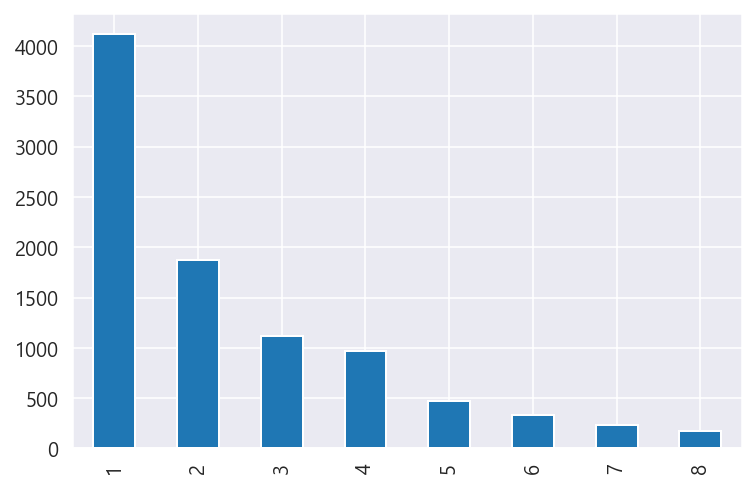

In [7]:
Y.value_counts().plot(kind = 'bar')

In [8]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\82105\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
stopwords=stopwords.words('english')

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [11]:
okt = Okt()

In [15]:
X_train_ = []
for sentence in X_train:
    temp = []
    temp = okt.morphs(sentence, stem=True) 
    temp = [word for word in temp if not word in stopwords] 
    X_train_.append(temp)

In [16]:
X_test_ = []
for sentence in X_test:
    temp = []
    temp = okt.morphs(sentence, stem=True)
    temp = [word for word in temp if not word in stopwords]
    X_test_.append(temp)

In [17]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_)

In [18]:
print(tokenizer.word_index)

{'i': 1, 'oh': 2, 'im': 3, 'well': 4, 'okay': 5, 'yeah': 6, 'dont': 7, 'know': 8, 'you': 9, 'right': 10, 'go': 11, 'no': 12, 'gonna': 13, 'thats': 14, 'like': 15, 'hey': 16, 'get': 17, 'youre': 18, 'think': 19, 'yknow': 20, 'really': 21, 'uh': 22, 'look': 23, 'got': 24, 'one': 25, 'what': 26, 'see': 27, 'mean': 28, 'and': 29, 'so': 30, 'god': 31, 'want': 32, 'come': 33, 'its': 34, 'good': 35, 'great': 36, 'ross': 37, 'sorry': 38, 'all': 39, 'cant': 40, 'tell': 41, 'joey': 42, 'umm': 43, 'going': 44, 'guys': 45, 'would': 46, 'but': 47, 'could': 48, 'back': 49, 'ill': 50, 'little': 51, 'time': 52, 'hes': 53, 'chandler': 54, 'love': 55, 'something': 56, 'we': 57, 'yes': 58, 'didnt': 59, 'say': 60, 'rachel': 61, 'hi': 62, 'guy': 63, 'monica': 64, 'ive': 65, 'this': 66, 'wanna': 67, 'thing': 68, 'make': 69, 'how': 70, 'that': 71, 'ok': 72, 'thank': 73, 'phoebe': 74, 'take': 75, 'shes': 76, 'the': 77, 'let': 78, 'listen': 79, 'much': 80, 'need': 81, 'us': 82, 'wow': 83, 'said': 84, 'it': 85,

# Padding

In [19]:
threshold = 2
total = len(tokenizer.word_index) 
rare = 0 
total_ = 0 
rare_ = 0 


for key, value in tokenizer.word_counts.items():
    total_ = total_ + value

    if(value < threshold):
        rare = rare + 1
        rare_ = rare_ + value

print('단어 집합의 크기 :',total)
print('빈도가 %s번 이하인 희귀 단어 수: %s'%(threshold - 1, rare))
print("집합에서 희귀 단어 비율:", (rare / total)*100)
print("전체 빈도에서 희귀 단어 빈도 비율:", (rare_ / total_)*100)

단어 집합의 크기 : 4855
빈도가 1번 이하인 희귀 단어 수: 2668
집합에서 희귀 단어 비율: 54.95365602471679
전체 빈도에서 희귀 단어 빈도 비율: 7.7031904143207734


In [20]:
size = total - rare + 1 # 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거. 0번 패딩 토큰을 고려하여 +1
print('단어 집합의 크기 :',size)

단어 집합의 크기 : 2188


In [22]:
tokenizer = Tokenizer(size) 
tokenizer.fit_on_texts(X_train_)
X_train = tokenizer.texts_to_sequences(X_train_)
X_test = tokenizer.texts_to_sequences(X_test_)

In [23]:
drop1 = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
drop2 = [index for index, sentence in enumerate(X_test) if len(sentence) < 1]

In [24]:
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [25]:
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop1, axis=0)
Y_train = np.delete(Y_train, drop1, axis=0)
X_test = np.delete(X_test, drop2, axis=0)
Y_test = np.delete(Y_test, drop2, axis=0)
print(len(X_train))
print(len(Y_train))

6415
6415


Max length : 37
Mean length : 4.983164458300857


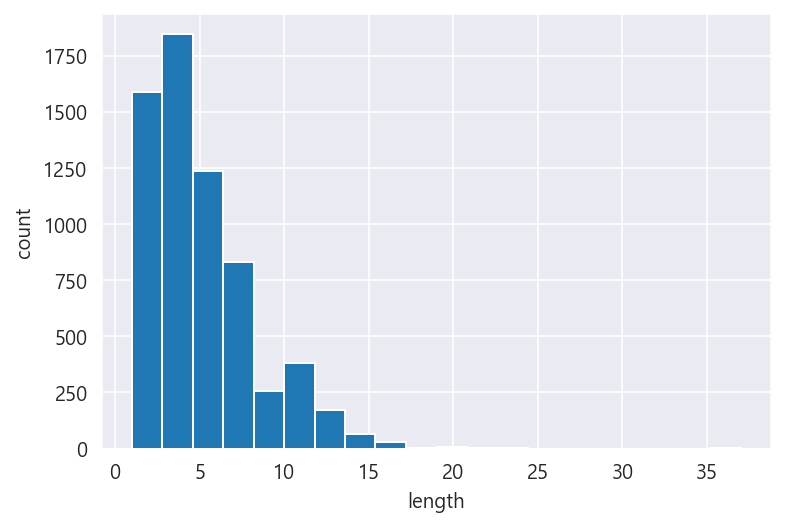

In [28]:
print('Max length :',max(len(l) for l in X_train))
print('Mean length :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=20)

plt.xlabel('length')
plt.ylabel('count')
plt.show()

In [29]:
def under(max_len, list):
    a = 0
    for s in list:
        if(len(s) <= max_len):
            a = a + 1
    print('길이가 %s 이하인 비율: %s'%(max_len, (a / len(list))*100))

In [30]:
max_len = 10
under(max_len, X_train)

길이가 10 이하인 비율: 93.21901792673421


In [31]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

In [32]:
X_train

array([[  0,  18, 375, ..., 424,   1, 284],
       [  0,   0,   0, ...,   0,   0, 111],
       [  0,   0,   0, ..., 102, 122,  45],
       ...,
       [  0,   0,   0, ...,   0,   0, 885],
       [  0,   0,   0, ...,   0, 229, 434],
       [  0,   0,   0, ..., 473, 256, 926]])

# Modeling

## LSTM

In [34]:
from tensorflow.keras.layers import Embedding, Dense, LSTM,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

In [55]:
model = Sequential()
model.add(Embedding(size, 100))
model.add(LSTM(64))
Dropout(0.5)
model.add(Dense(32))
model.add(Dense(9, activation='softmax'))

In [56]:
early = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [57]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, Y_train, epochs=10, callbacks=[early], batch_size=10, validation_split=0.2)

Train on 5132 samples, validate on 1283 samples
Epoch 1/10
5132/5132 [==============================] - 4s 822us/sample - loss: 1.6176 - acc: 0.4369 - val_loss: 1.5664 - val_acc: 0.4528
Epoch 2/10
5132/5132 [==============================] - 3s 531us/sample - loss: 1.4701 - acc: 0.4795 - val_loss: 1.5543 - val_acc: 0.4279
Epoch 3/10
5132/5132 [==============================] - 3s 529us/sample - loss: 1.3565 - acc: 0.5216 - val_loss: 1.5226 - val_acc: 0.4700
Epoch 4/10
5132/5132 [==============================] - 3s 542us/sample - loss: 1.2688 - acc: 0.5540 - val_loss: 1.5660 - val_acc: 0.4754
Epoch 5/10
5132/5132 [==============================] - 3s 532us/sample - loss: 1.1968 - acc: 0.5828 - val_loss: 1.5638 - val_acc: 0.4762
Epoch 6/10
5132/5132 [==============================] - 3s 531us/sample - loss: 1.1228 - acc: 0.6081 - val_loss: 1.6743 - val_acc: 0.4474
Epoch 00006: early stopping


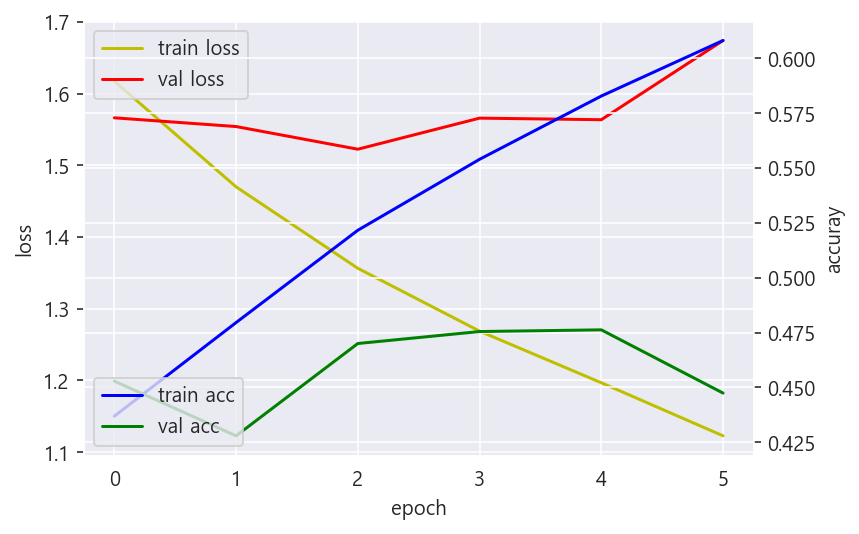

In [59]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [58]:
model.evaluate(X_test,Y_test)[1]

2734/2734 [==============================] - 0s 72us/sample - loss: 1.6847 - acc: 0.4418


0.44184345